### Analytics Vidya Health Care Analytics II

#### Import Necessary Libraries

In [513]:
import pandas as pd # basic operation
import numpy as np # for doing numerical operation
import matplotlib.pyplot as plt # 2d plot
import seaborn as sns #visualization library
from sklearn.model_selection import train_test_split #Spliting method
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier#Ensemble models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #Metrics
from category_encoders import LeaveOneOutEncoder #Encoding
from mlxtend.classifier import StackingCVClassifier

#### Importing Data

In [10]:
train_df = pd.read_csv('Train_hMYJ020/train.csv')# train data

test_df = pd.read_csv('test.csv')#test data 

sample_df = pd.read_csv('sample_submission_lfbv3c3.csv')#Sample submission data

descrip = pd.read_csv('Train_hMYJ020/train_data_dict.csv')

In [12]:
# Desription about data set columns.
descrip

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


#### Descriptive Analytics

In [13]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [14]:
train_df.info()
# we have 318438 rows and 18 columns in training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [15]:
test_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [16]:
test_df.info()
#In dataset to predict values, we have 137057 rows and 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [18]:
sample_df.head()
#Sample submission format

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [20]:
train_df.describe(include = 'all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,143425,NaN,133336,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,159219.500000,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,91925.276847,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79610.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,159219.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,238828.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [25]:
train_df.isna().sum()
#We have 113 null values in Bedgrade column and 4532 null values in City Code patient column

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [29]:
test_df.isna().sum()
#In test dataset 35 null values in Ward Facility Code column and 2157 null values in City Code Patient column.

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [266]:
df = pd.concat([train_df, test_df], axis = 0)
df.head()
#Concatenation

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


#### EDA

In [34]:
#To get unique values and its respective value counts.
def normal(col):
    print('No of unique values:\t', train_df[col].nunique()) #No of unique values.
    print('Values Count:\n', train_df[col].value_counts()) # Count of unique values.

In [82]:
def percent_cat(col):
    groupped = train_df.groupby([col])['Stay'].value_counts()
    y=0
    for i in groupped.index:
        total_val = np.sum(train_df[col] == i[0])
        print(f'Percent of {i[1]} Stay of {i[0]}  in column {col} is {round((groupped[i]/total_val)*100,2)}%')
        try:
            if groupped.index[y][0] != groupped.index[y+1][0]:
                print('\n')
        except IndexError:
            pass
        y+=1
    
#This user defined function is to get groupped df based on one column to find its respective stay.

In [86]:
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = train_df[col], hue = train_df['Stay'])

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

In [102]:
train_df.shape

(318438, 18)

In [103]:
train_df['case_id'].nunique()
#In Case Id column, all the values are unique, so, we can ignore that column before feeding it to the model 

318438

In [104]:
normal('Hospital_code')

No of unique values:	 32
Values Count:
 26    33076
23    26566
19    21219
6     20425
14    17328
11    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64


**Observations:**
* In training dataset there are 32 unique Hospital Code.
* Number 26 coded hospital have registered 33076 patients which is higher than other hospital.

In [105]:
percent_cat('Hospital_code')

Percent of 21-30 Stay of 1  in column Hospital_code is 25.43%
Percent of 11-20 Stay of 1  in column Hospital_code is 20.23%
Percent of 31-40 Stay of 1  in column Hospital_code is 17.85%
Percent of 51-60 Stay of 1  in column Hospital_code is 13.64%
Percent of 0-10 Stay of 1  in column Hospital_code is 7.03%
Percent of 71-80 Stay of 1  in column Hospital_code is 4.55%
Percent of 41-50 Stay of 1  in column Hospital_code is 4.1%
Percent of 81-90 Stay of 1  in column Hospital_code is 2.93%
Percent of More than 100 Days Stay of 1  in column Hospital_code is 2.19%
Percent of 61-70 Stay of 1  in column Hospital_code is 1.1%
Percent of 91-100 Stay of 1  in column Hospital_code is 0.93%


Percent of 21-30 Stay of 2  in column Hospital_code is 19.05%
Percent of 11-20 Stay of 2  in column Hospital_code is 19.01%
Percent of 31-40 Stay of 2  in column Hospital_code is 18.72%
Percent of 51-60 Stay of 2  in column Hospital_code is 18.48%
Percent of 71-80 Stay of 2  in column Hospital_code is 6.12%
Per

Percent of 91-100 Stay of 19  in column Hospital_code is 0.42%
Percent of 61-70 Stay of 19  in column Hospital_code is 0.34%


Percent of 11-20 Stay of 20  in column Hospital_code is 20.5%
Percent of 21-30 Stay of 20  in column Hospital_code is 19.22%
Percent of 51-60 Stay of 20  in column Hospital_code is 17.51%
Percent of 31-40 Stay of 20  in column Hospital_code is 16.23%
Percent of 0-10 Stay of 20  in column Hospital_code is 8.26%
Percent of 71-80 Stay of 20  in column Hospital_code is 5.05%
Percent of 41-50 Stay of 20  in column Hospital_code is 4.2%
Percent of More than 100 Days Stay of 20  in column Hospital_code is 3.49%
Percent of 81-90 Stay of 20  in column Hospital_code is 3.35%
Percent of 91-100 Stay of 20  in column Hospital_code is 1.35%
Percent of 61-70 Stay of 20  in column Hospital_code is 0.85%


Percent of 21-30 Stay of 21  in column Hospital_code is 22.43%
Percent of 11-20 Stay of 21  in column Hospital_code is 22.12%
Percent of 31-40 Stay of 21  in column Hospital_

**Observation:**
* In most of the hospital patient's stay for 21-30 days or 11-20 days and in the rare case they are staying for 61-70 days or 91-100 days

In [106]:
normal('Hospital_type_code')

No of unique values:	 7
Values Count:
 a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64


In [116]:
train_df.groupby('Hospital_type_code')['Hospital_code'].value_counts().unstack().loc['a'].sum()

143425.0

In [120]:
train_df.groupby('Hospital_type_code')['Hospital_code'].value_counts()

Hospital_type_code  Hospital_code
a                   23               26566
                    19               21219
                    6                20425
                    14               17328
                    27               14244
                    29               11311
                    12               11297
                    24                7992
                    5                 5261
                    13                5236
                    7                 1306
                    4                 1240
b                   26               33076
                    11               17328
                    28               17137
                    20                1405
c                   15                9257
                    21                8150
                    3                 7116
                    2                 5102
                    30                5002
                    31                3967
                    

**Observation:**
* Above are the list of Hospital code with its respective Hospital type code

In [118]:
normal('City_Code_Hospital')

No of unique values:	 11
Values Count:
 1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64


**Observations:**
* There are 11 unique city code of the hospital and the hospital in the city code 1 has more no. of patients.

In [121]:
percent_cat('City_Code_Hospital')

Percent of 21-30 Stay of 1  in column City_Code_Hospital is 29.55%
Percent of 11-20 Stay of 1  in column City_Code_Hospital is 27.25%
Percent of 31-40 Stay of 1  in column City_Code_Hospital is 16.65%
Percent of 51-60 Stay of 1  in column City_Code_Hospital is 10.13%
Percent of 0-10 Stay of 1  in column City_Code_Hospital is 6.3%
Percent of 41-50 Stay of 1  in column City_Code_Hospital is 3.08%
Percent of 71-80 Stay of 1  in column City_Code_Hospital is 2.73%
Percent of More than 100 Days Stay of 1  in column City_Code_Hospital is 1.55%
Percent of 81-90 Stay of 1  in column City_Code_Hospital is 1.33%
Percent of 61-70 Stay of 1  in column City_Code_Hospital is 0.74%
Percent of 91-100 Stay of 1  in column City_Code_Hospital is 0.7%


Percent of 21-30 Stay of 2  in column City_Code_Hospital is 29.14%
Percent of 11-20 Stay of 2  in column City_Code_Hospital is 19.0%
Percent of 31-40 Stay of 2  in column City_Code_Hospital is 17.95%
Percent of 51-60 Stay of 2  in column City_Code_Hospital 

**Observation:**
* Most of the hospital in the respective city code have more probablity of patients who stay for 21-30 days in hospital

In [122]:
train_df.groupby('City_Code_Hospital')['Hospital_code'].value_counts()

City_Code_Hospital  Hospital_code
1                   14               17328
                    25                9834
                    10                9435
                    24                7992
                    17                5501
                    5                 5261
2                   26               33076
                    11               17328
                    20                1405
3                   21                8150
                    3                 7116
                    30                5002
                    31                3967
                    16                3671
                    8                 3663
4                   29               11311
                    7                 1306
                    4                 1240
5                   9                11510
                    15                9257
                    13                5236
                    2                 5102
6                   

**Observation:**
* Here are the list of hospitals who falls in the particular city limit.

In [83]:
percent_cat('Hospital_region_code')
#Percentage of stay in their respective unique values of column

Percent of 21-30 Stay of X  in column Hospital_region_code is 29.08%
Percent of 11-20 Stay of X  in column Hospital_region_code is 25.41%
Percent of 31-40 Stay of X  in column Hospital_region_code is 17.12%
Percent of 51-60 Stay of X  in column Hospital_region_code is 11.04%
Percent of 0-10 Stay of X  in column Hospital_region_code is 6.11%
Percent of 41-50 Stay of X  in column Hospital_region_code is 3.3%
Percent of 71-80 Stay of X  in column Hospital_region_code is 3.07%
Percent of More than 100 Days Stay of X  in column Hospital_region_code is 1.81%
Percent of 81-90 Stay of X  in column Hospital_region_code is 1.43%
Percent of 91-100 Stay of X  in column Hospital_region_code is 0.86%
Percent of 61-70 Stay of X  in column Hospital_region_code is 0.76%


Percent of 21-30 Stay of Y  in column Hospital_region_code is 25.81%
Percent of 11-20 Stay of Y  in column Hospital_region_code is 24.33%
Percent of 31-40 Stay of Y  in column Hospital_region_code is 17.41%
Percent of 51-60 Stay of Y 

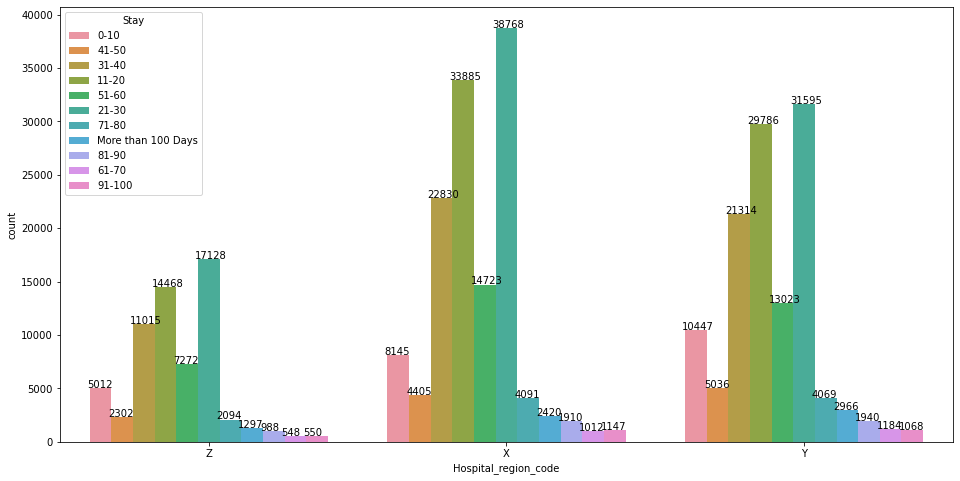

In [97]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = train_df['Hospital_region_code'], hue = train_df['Stay'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+30))

**Observations:**
* Most of the patients stays for 21-30 days in the hospital in the respective Hospital Region Code.

In [127]:
train_df.groupby(['Hospital_region_code',  'Hospital_type_code','City_Code_Hospital',])['Hospital_code'].value_counts()

Hospital_region_code  Hospital_type_code  City_Code_Hospital  Hospital_code
X                     a                   1                   14               17328
                                                              24                7992
                                                              5                 5261
                                          4                   29               11311
                                                              7                 1306
                                                              4                 1240
                                          6                   23               26566
                                                              6                20425
                      b                   11                  28               17137
                      e                   1                   25                9834
                                                              10          

**Observation**:
* List of Hospital groupped based on the Hospital region code, Hospital type code, City_Code_Hospital 

In [128]:
train_df['Available Extra Rooms in Hospital']

0         3
1         2
2         2
3         2
4         2
         ..
318433    3
318434    2
318435    3
318436    3
318437    5
Name: Available Extra Rooms in Hospital, Length: 318438, dtype: int64

In [129]:
normal('Available Extra Rooms in Hospital')

No of unique values:	 18
Values Count:
 2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64


In [ ]:
groupped

In [133]:
percent_cat('Available Extra Rooms in Hospital')

Percent of 21-30 Stay of 0  in column Available Extra Rooms in Hospital is 73.33%
Percent of 41-50 Stay of 0  in column Available Extra Rooms in Hospital is 13.33%
Percent of 51-60 Stay of 0  in column Available Extra Rooms in Hospital is 6.67%
Percent of More than 100 Days Stay of 0  in column Available Extra Rooms in Hospital is 6.67%


Percent of 31-40 Stay of 1  in column Available Extra Rooms in Hospital is 19.08%
Percent of 11-20 Stay of 1  in column Available Extra Rooms in Hospital is 17.25%
Percent of 51-60 Stay of 1  in column Available Extra Rooms in Hospital is 16.95%
Percent of 21-30 Stay of 1  in column Available Extra Rooms in Hospital is 15.34%
Percent of 0-10 Stay of 1  in column Available Extra Rooms in Hospital is 7.69%
Percent of More than 100 Days Stay of 1  in column Available Extra Rooms in Hospital is 6.16%
Percent of 71-80 Stay of 1  in column Available Extra Rooms in Hospital is 6.09%
Percent of 41-50 Stay of 1  in column Available Extra Rooms in Hospital is 4

Percent of 51-60 Stay of 20  in column Available Extra Rooms in Hospital is 50.0%
Percent of More than 100 Days Stay of 20  in column Available Extra Rooms in Hospital is 50.0%


Percent of 41-50 Stay of 21  in column Available Extra Rooms in Hospital is 66.67%
Percent of More than 100 Days Stay of 21  in column Available Extra Rooms in Hospital is 33.33%


Percent of 0-10 Stay of 24  in column Available Extra Rooms in Hospital is 100.0%


**Observation:**
* Most of the hosiptal have 2 extra beds in the hospital.

In [131]:
normal('Department')

No of unique values:	 5
Values Count:
 gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64


**Observation:**
* Gynecology Department (The medical practice dealing with the health of the female reproductive system) has more no of patients whereas Surgery Department has low number of patients admitted.

In [134]:
percent_cat('Department')

Percent of 21-30 Stay of TB & Chest disease  in column Department is 27.31%
Percent of 11-20 Stay of TB & Chest disease  in column Department is 24.82%
Percent of 31-40 Stay of TB & Chest disease  in column Department is 18.29%
Percent of 51-60 Stay of TB & Chest disease  in column Department is 10.92%
Percent of 0-10 Stay of TB & Chest disease  in column Department is 8.25%
Percent of 41-50 Stay of TB & Chest disease  in column Department is 3.13%
Percent of 71-80 Stay of TB & Chest disease  in column Department is 3.07%
Percent of 81-90 Stay of TB & Chest disease  in column Department is 1.46%
Percent of More than 100 Days Stay of TB & Chest disease  in column Department is 1.29%
Percent of 61-70 Stay of TB & Chest disease  in column Department is 0.79%
Percent of 91-100 Stay of TB & Chest disease  in column Department is 0.67%


Percent of 21-30 Stay of anesthesia  in column Department is 30.19%
Percent of 11-20 Stay of anesthesia  in column Department is 29.76%
Percent of 31-40 Sta

**Observation:**
* In most of the department patients were stayed for 21-30 days.

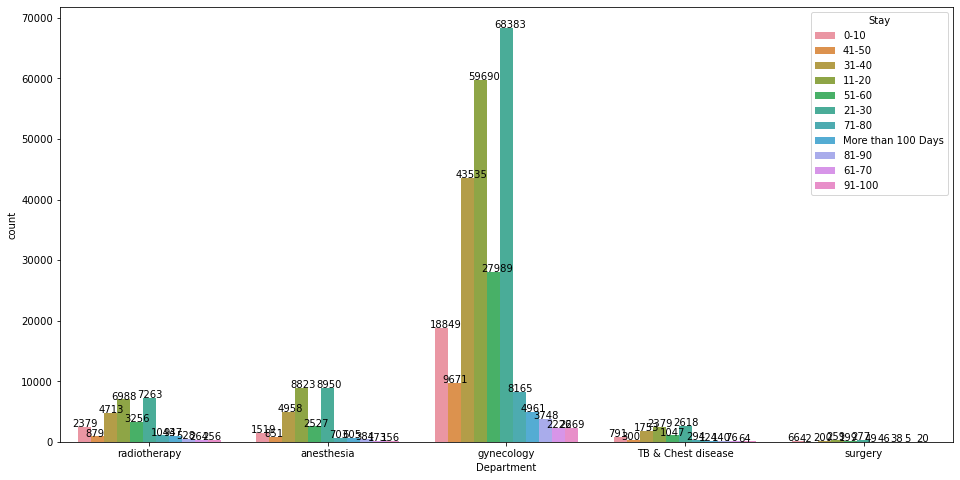

In [138]:
#Count plot
plt.figure(figsize = (16,8))
ax = sns.countplot(x = train_df['Department'], hue = train_df['Stay'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.03, p.get_height()+30))

In [139]:
normal('Ward_Type')

No of unique values:	 6
Values Count:
 R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64


**Observation**
* R ward type has high frequency, whereas U ward type has low frequency.

In [140]:
percent_cat('Ward_Type')

Percent of 21-30 Stay of P  in column Ward_Type is 35.71%
Percent of 11-20 Stay of P  in column Ward_Type is 27.61%
Percent of 31-40 Stay of P  in column Ward_Type is 14.76%
Percent of 0-10 Stay of P  in column Ward_Type is 9.14%
Percent of 41-50 Stay of P  in column Ward_Type is 5.65%
Percent of 51-60 Stay of P  in column Ward_Type is 3.69%
Percent of 61-70 Stay of P  in column Ward_Type is 1.45%
Percent of 71-80 Stay of P  in column Ward_Type is 1.05%
Percent of More than 100 Days Stay of P  in column Ward_Type is 0.36%
Percent of 91-100 Stay of P  in column Ward_Type is 0.32%
Percent of 81-90 Stay of P  in column Ward_Type is 0.28%


Percent of 21-30 Stay of Q  in column Ward_Type is 32.72%
Percent of 11-20 Stay of Q  in column Ward_Type is 27.51%
Percent of 31-40 Stay of Q  in column Ward_Type is 16.18%
Percent of 0-10 Stay of Q  in column Ward_Type is 7.83%
Percent of 51-60 Stay of Q  in column Ward_Type is 6.13%
Percent of 41-50 Stay of Q  in column Ward_Type is 4.66%
Percent of 

**Observation:**
* In S ward type, more percentage of patients stay for 11-20 days
* In U ward type there is only limited labels of stay, where patients probably stay for 11-20 days or 21-30 days.

In [141]:
normal('Ward_Facility_Code')

No of unique values:	 6
Values Count:
 F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64


**Observation:**
* F ward faciltiy has more no. of patients admitted.

In [143]:
percent_cat('Ward_Facility_Code')

Percent of 21-30 Stay of A  in column Ward_Facility_Code is 26.79%
Percent of 11-20 Stay of A  in column Ward_Facility_Code is 21.98%
Percent of 31-40 Stay of A  in column Ward_Facility_Code is 17.93%
Percent of 51-60 Stay of A  in column Ward_Facility_Code is 11.31%
Percent of 0-10 Stay of A  in column Ward_Facility_Code is 8.54%
Percent of 41-50 Stay of A  in column Ward_Facility_Code is 4.29%
Percent of 71-80 Stay of A  in column Ward_Facility_Code is 3.47%
Percent of More than 100 Days Stay of A  in column Ward_Facility_Code is 2.28%
Percent of 81-90 Stay of A  in column Ward_Facility_Code is 1.46%
Percent of 91-100 Stay of A  in column Ward_Facility_Code is 1.04%
Percent of 61-70 Stay of A  in column Ward_Facility_Code is 0.91%


Percent of 21-30 Stay of B  in column Ward_Facility_Code is 24.54%
Percent of 11-20 Stay of B  in column Ward_Facility_Code is 22.4%
Percent of 31-40 Stay of B  in column Ward_Facility_Code is 18.26%
Percent of 51-60 Stay of B  in column Ward_Facility_Cod

**Observation:**
* In C type ward facility patients stay mostly 11-20 days

In [144]:
normal('Bed Grade')

No of unique values:	 4
Values Count:
 2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64


**Observation:**
* Bed Grade 2 and 3 have high frequency.

In [145]:
percent_cat('Bed Grade')

Percent of 21-30 Stay of 1.0  in column Bed Grade is 28.41%
Percent of 11-20 Stay of 1.0  in column Bed Grade is 21.16%
Percent of 31-40 Stay of 1.0  in column Bed Grade is 16.65%
Percent of 51-60 Stay of 1.0  in column Bed Grade is 11.7%
Percent of 0-10 Stay of 1.0  in column Bed Grade is 8.75%
Percent of 41-50 Stay of 1.0  in column Bed Grade is 4.07%
Percent of 71-80 Stay of 1.0  in column Bed Grade is 3.8%
Percent of More than 100 Days Stay of 1.0  in column Bed Grade is 2.03%
Percent of 81-90 Stay of 1.0  in column Bed Grade is 1.35%
Percent of 91-100 Stay of 1.0  in column Bed Grade is 1.05%
Percent of 61-70 Stay of 1.0  in column Bed Grade is 1.04%


Percent of 21-30 Stay of 2.0  in column Bed Grade is 33.65%
Percent of 11-20 Stay of 2.0  in column Bed Grade is 20.66%
Percent of 31-40 Stay of 2.0  in column Bed Grade is 16.27%
Percent of 51-60 Stay of 2.0  in column Bed Grade is 11.08%
Percent of 0-10 Stay of 2.0  in column Bed Grade is 7.51%
Percent of 41-50 Stay of 2.0  in col

**Observation:**
* In Bed Grade 1 and 2 most of the patients were stayed for 21-30 days, whereas in Bed Grade 3 and 4 most of the patients for 11-20 days.

In [147]:
normal('patientid')

No of unique values:	 92017
Values Count:
 66714     50
91292     43
38525     39
101359    36
33491     34
          ..
76392      1
80490      1
28600      1
57802      1
58524      1
Name: patientid, Length: 92017, dtype: int64


**Observation:**
* Patient ID. 66714 has 50 registered disease.
* There are 92017 unique patients stayed.

In [149]:
train_df[train_df['patientid']==66714]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
253799,253800,6,a,6,X,4,gynecology,R,F,3.0,66714,2.0,Trauma,Extreme,18,71-80,2988.0,More than 100 Days
253800,253801,6,a,6,X,3,gynecology,R,F,3.0,66714,2.0,Trauma,Extreme,18,71-80,4601.0,More than 100 Days
253801,253802,26,b,2,Y,2,radiotherapy,S,D,1.0,66714,2.0,Trauma,Extreme,2,71-80,5548.0,More than 100 Days
253802,253803,26,b,2,Y,2,radiotherapy,S,D,1.0,66714,2.0,Trauma,Extreme,2,71-80,5617.0,More than 100 Days
253803,253804,6,a,6,X,4,radiotherapy,Q,F,2.0,66714,2.0,Trauma,Extreme,2,71-80,3269.0,51-60
253804,253805,6,a,6,X,4,radiotherapy,R,F,2.0,66714,2.0,Trauma,Extreme,2,71-80,4574.0,51-60
253805,253806,19,a,7,Y,2,radiotherapy,S,C,1.0,66714,2.0,Emergency,Extreme,4,71-80,4192.0,More than 100 Days
253806,253807,19,a,7,Y,2,radiotherapy,S,C,1.0,66714,2.0,Emergency,Extreme,4,71-80,3929.0,More than 100 Days
253807,253808,6,a,6,X,4,radiotherapy,Q,F,2.0,66714,2.0,Trauma,Extreme,5,71-80,5486.0,31-40
253808,253809,6,a,6,X,2,gynecology,R,F,2.0,66714,2.0,Trauma,Extreme,2,71-80,4607.0,21-30


In [150]:
train_df['City_Code_Patient']

0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
318433    23.0
318434     8.0
318435    10.0
318436     8.0
318437     8.0
Name: City_Code_Patient, Length: 318438, dtype: float64

In [151]:
normal('City_Code_Patient')

No of unique values:	 37
Values Count:
 8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64


In [152]:
percent_cat('City_Code_Patient')

Percent of 21-30 Stay of 1.0  in column City_Code_Patient is 29.27%
Percent of 11-20 Stay of 1.0  in column City_Code_Patient is 24.81%
Percent of 31-40 Stay of 1.0  in column City_Code_Patient is 17.11%
Percent of 51-60 Stay of 1.0  in column City_Code_Patient is 11.62%
Percent of 0-10 Stay of 1.0  in column City_Code_Patient is 7.05%
Percent of 71-80 Stay of 1.0  in column City_Code_Patient is 2.79%
Percent of 41-50 Stay of 1.0  in column City_Code_Patient is 2.78%
Percent of More than 100 Days Stay of 1.0  in column City_Code_Patient is 1.72%
Percent of 81-90 Stay of 1.0  in column City_Code_Patient is 1.46%
Percent of 91-100 Stay of 1.0  in column City_Code_Patient is 0.74%
Percent of 61-70 Stay of 1.0  in column City_Code_Patient is 0.65%


Percent of 21-30 Stay of 2.0  in column City_Code_Patient is 30.57%
Percent of 11-20 Stay of 2.0  in column City_Code_Patient is 26.22%
Percent of 31-40 Stay of 2.0  in column City_Code_Patient is 16.4%
Percent of 51-60 Stay of 2.0  in column C

Percent of 61-70 Stay of 20.0  in column City_Code_Patient is 0.85%
Percent of 91-100 Stay of 20.0  in column City_Code_Patient is 0.57%


Percent of 11-20 Stay of 21.0  in column City_Code_Patient is 36.2%
Percent of 21-30 Stay of 21.0  in column City_Code_Patient is 21.97%
Percent of 31-40 Stay of 21.0  in column City_Code_Patient is 15.17%
Percent of 0-10 Stay of 21.0  in column City_Code_Patient is 14.86%
Percent of 51-60 Stay of 21.0  in column City_Code_Patient is 6.3%
Percent of 41-50 Stay of 21.0  in column City_Code_Patient is 2.62%
Percent of 71-80 Stay of 21.0  in column City_Code_Patient is 1.75%
Percent of 61-70 Stay of 21.0  in column City_Code_Patient is 0.37%
Percent of More than 100 Days Stay of 21.0  in column City_Code_Patient is 0.31%
Percent of 81-90 Stay of 21.0  in column City_Code_Patient is 0.25%
Percent of 91-100 Stay of 21.0  in column City_Code_Patient is 0.19%


Percent of 21-30 Stay of 22.0  in column City_Code_Patient is 23.7%
Percent of 11-20 Stay of 22.

Percent of More than 100 Days Stay of 31.0  in column City_Code_Patient is 1.69%


Percent of 21-30 Stay of 32.0  in column City_Code_Patient is 38.46%
Percent of 11-20 Stay of 32.0  in column City_Code_Patient is 19.23%
Percent of 0-10 Stay of 32.0  in column City_Code_Patient is 13.46%
Percent of 31-40 Stay of 32.0  in column City_Code_Patient is 11.54%
Percent of 41-50 Stay of 32.0  in column City_Code_Patient is 5.77%
Percent of 51-60 Stay of 32.0  in column City_Code_Patient is 5.77%
Percent of 71-80 Stay of 32.0  in column City_Code_Patient is 1.92%
Percent of 91-100 Stay of 32.0  in column City_Code_Patient is 1.92%
Percent of More than 100 Days Stay of 32.0  in column City_Code_Patient is 1.92%


Percent of 11-20 Stay of 33.0  in column City_Code_Patient is 34.62%
Percent of 21-30 Stay of 33.0  in column City_Code_Patient is 33.33%
Percent of 31-40 Stay of 33.0  in column City_Code_Patient is 12.82%
Percent of 51-60 Stay of 33.0  in column City_Code_Patient is 7.69%
Percent of 

In [153]:
normal('Type of Admission')

No of unique values:	 3
Values Count:
 Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64


In [154]:
percent_cat('Type of Admission')

Percent of 11-20 Stay of Emergency  in column Type of Admission is 26.82%
Percent of 21-30 Stay of Emergency  in column Type of Admission is 23.28%
Percent of 31-40 Stay of Emergency  in column Type of Admission is 16.08%
Percent of 0-10 Stay of Emergency  in column Type of Admission is 12.08%
Percent of 51-60 Stay of Emergency  in column Type of Admission is 10.1%
Percent of 41-50 Stay of Emergency  in column Type of Admission is 3.52%
Percent of 71-80 Stay of Emergency  in column Type of Admission is 2.87%
Percent of More than 100 Days Stay of Emergency  in column Type of Admission is 2.17%
Percent of 81-90 Stay of Emergency  in column Type of Admission is 1.45%
Percent of 61-70 Stay of Emergency  in column Type of Admission is 0.83%
Percent of 91-100 Stay of Emergency  in column Type of Admission is 0.79%


Percent of 21-30 Stay of Trauma  in column Type of Admission is 30.37%
Percent of 11-20 Stay of Trauma  in column Type of Admission is 22.16%
Percent of 31-40 Stay of Trauma  in 

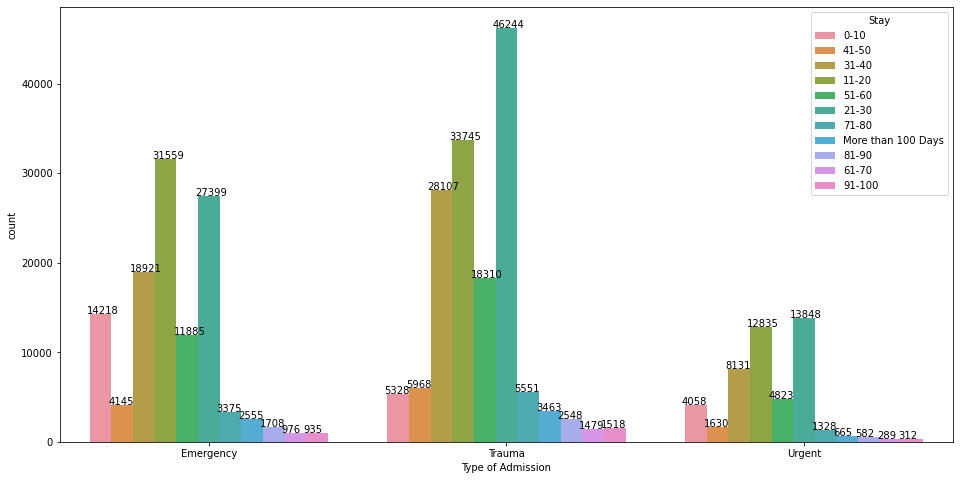

In [157]:
#Count plot
plt.figure(figsize = (16,8))
ax = sns.countplot(x = train_df['Type of Admission'], hue = train_df['Stay'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+30))

**Observation:**
* Emergency patients stayed mostly for 11-20 days
* There are more number Trauma patients who stayed for 21-30 days in hospital

In [155]:
normal('Severity of Illness')

No of unique values:	 3
Values Count:
 Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64


In [158]:
percent_cat('Severity of Illness')

Percent of 21-30 Stay of Extreme  in column Severity of Illness is 27.33%
Percent of 11-20 Stay of Extreme  in column Severity of Illness is 18.54%
Percent of 31-40 Stay of Extreme  in column Severity of Illness is 17.78%
Percent of 51-60 Stay of Extreme  in column Severity of Illness is 13.71%
Percent of 0-10 Stay of Extreme  in column Severity of Illness is 5.99%
Percent of 71-80 Stay of Extreme  in column Severity of Illness is 4.54%
Percent of 41-50 Stay of Extreme  in column Severity of Illness is 4.14%
Percent of More than 100 Days Stay of Extreme  in column Severity of Illness is 3.44%
Percent of 81-90 Stay of Extreme  in column Severity of Illness is 1.96%
Percent of 91-100 Stay of Extreme  in column Severity of Illness is 1.42%
Percent of 61-70 Stay of Extreme  in column Severity of Illness is 1.14%


Percent of 11-20 Stay of Minor  in column Severity of Illness is 31.54%
Percent of 21-30 Stay of Minor  in column Severity of Illness is 25.08%
Percent of 31-40 Stay of Minor  in

**Observation:**
* 175843 patients have Moderate Severity of illness.


In [159]:
normal('Visitors with Patient')

No of unique values:	 28
Values Count:
 2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64


In [162]:
percent_cat('Visitors with Patient')

Percent of 21-30 Stay of 0  in column Visitors with Patient is 59.09%
Percent of 11-20 Stay of 0  in column Visitors with Patient is 27.27%
Percent of 31-40 Stay of 0  in column Visitors with Patient is 9.09%
Percent of 51-60 Stay of 0  in column Visitors with Patient is 4.55%


Percent of 11-20 Stay of 1  in column Visitors with Patient is 29.25%
Percent of 0-10 Stay of 1  in column Visitors with Patient is 25.35%
Percent of 21-30 Stay of 1  in column Visitors with Patient is 25.27%
Percent of 31-40 Stay of 1  in column Visitors with Patient is 11.43%
Percent of 41-50 Stay of 1  in column Visitors with Patient is 5.39%
Percent of 51-60 Stay of 1  in column Visitors with Patient is 1.41%
Percent of 61-70 Stay of 1  in column Visitors with Patient is 1.41%
Percent of 71-80 Stay of 1  in column Visitors with Patient is 0.17%
Percent of 81-90 Stay of 1  in column Visitors with Patient is 0.17%
Percent of 91-100 Stay of 1  in column Visitors with Patient is 0.08%
Percent of More than 100 D

**Observations:**
* Higher the number of visitors with patients, the probability of patients staying more than 100 days is higher

In [164]:
normal('Age')

No of unique values:	 10
Values Count:
 41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64


**Observations**
* Patients stayed in the hospital were mostly in the age range of 41-50 and 31-40.

In [166]:
percent_cat('Age')

Percent of 11-20 Stay of 0-10  in column Age is 31.32%
Percent of 21-30 Stay of 0-10  in column Age is 23.81%
Percent of 31-40 Stay of 0-10  in column Age is 16.21%
Percent of 0-10 Stay of 0-10  in column Age is 9.83%
Percent of 51-60 Stay of 0-10  in column Age is 9.31%
Percent of 41-50 Stay of 0-10  in column Age is 2.99%
Percent of 71-80 Stay of 0-10  in column Age is 2.45%
Percent of More than 100 Days Stay of 0-10  in column Age is 1.76%
Percent of 81-90 Stay of 0-10  in column Age is 1.34%
Percent of 91-100 Stay of 0-10  in column Age is 0.56%
Percent of 61-70 Stay of 0-10  in column Age is 0.42%


Percent of 11-20 Stay of 11-20  in column Age is 31.86%
Percent of 21-30 Stay of 11-20  in column Age is 25.72%
Percent of 31-40 Stay of 11-20  in column Age is 15.99%
Percent of 0-10 Stay of 11-20  in column Age is 9.26%
Percent of 51-60 Stay of 11-20  in column Age is 8.52%
Percent of 41-50 Stay of 11-20  in column Age is 3.04%
Percent of 71-80 Stay of 11-20  in column Age is 2.09%
P

**Observation:**
* All age range patients normally stay for 21-30 days.

In [168]:
train_df['Admission_Deposit'].nunique()

7300

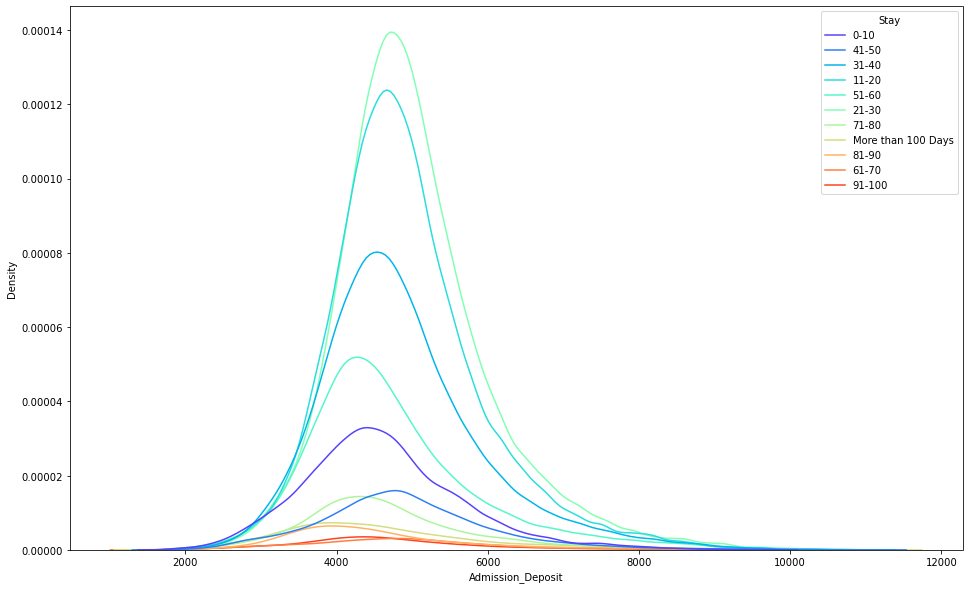

In [173]:
plt.figure(figsize = (16,10))
sns.kdeplot(train_df['Admission_Deposit'], hue=train_df['Stay'], palette='rainbow');

**Observation:**
* Admission Deposit amount are normally distributed, it falls mostly in range the between 4000 - 6000.

#### Feature Engineering

In [267]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [268]:
df[df['Bed Grade'].isna()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420.0,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395.0,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989.0,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488.0,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100517,418956,6,a,6,X,2,gynecology,R,F,NaN,52799,7.0,Emergency,Moderate,2,41-50,4613.0,NaN
100698,419137,6,a,6,X,2,gynecology,R,F,NaN,62257,1.0,Trauma,Moderate,3,61-70,5191.0,NaN
100704,419143,6,a,6,X,2,gynecology,R,F,NaN,39394,2.0,Emergency,Moderate,2,41-50,3451.0,NaN
101594,420033,6,a,6,X,3,gynecology,R,F,NaN,57420,2.0,Trauma,Moderate,2,51-60,4967.0,NaN


In [269]:
uniq_hos_code = df[df['Bed Grade'].isna()] ['Hospital_code'].unique()
uniq_hos_code
#Seems like 3 hospital coded 6, 19 and 7 have null values in Bed Grade

array([ 6, 19,  7])

In [270]:
df[df['Hospital_code']==6]['Bed Grade'].value_counts()
#Hopital Coded 6 has more frequency of 3 Bed Grade, so I'm replacing null values by mode value of its corresponding hospital code.

3.0    10852
2.0    10573
4.0     5686
1.0     1967
Name: Bed Grade, dtype: int64

In [271]:
df[df['Hospital_code']==6]['Bed Grade'].fillna(3.0).isna().sum()

0

In [272]:
def impute_bed(num):
    val = df[df['Hospital_code'] == num] ['Bed Grade'].mode()[0]
    data = df[df['Hospital_code'] == num] ['Bed Grade'].fillna(val)
    df.loc[df['Hospital_code'] == num,'Bed Grade'] = data
    print(val)

In [273]:
df['Bed Grade'].value_counts()

2.0    176451
3.0    158942
4.0     82387
1.0     37567
Name: Bed Grade, dtype: int64

In [274]:
for i in uniq_hos_code:
    impute_bed(i)

3.0
2.0
2.0


In [275]:
df.isna().sum()
#Replaced null values

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [276]:
df[df['City_Code_Patient'].isna()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136821,455260,32,f,9,Y,3,gynecology,S,B,2.0,98468,NaN,Emergency,Moderate,2,61-70,4021.0,NaN
136831,455270,6,a,6,X,5,anesthesia,Q,F,2.0,22980,NaN,Emergency,Minor,4,61-70,3989.0,NaN
136911,455350,28,b,11,X,3,TB & Chest disease,R,F,3.0,66381,NaN,Emergency,Moderate,5,61-70,4171.0,NaN
136943,455382,23,a,6,X,4,gynecology,Q,F,4.0,75055,NaN,Emergency,Minor,4,41-50,4445.0,NaN


In [278]:
df.loc[df['patientid']==66714]['City_Code_Patient']
#Each patients have their corresponding unique city code.

253799    2.0
253800    2.0
253801    2.0
253802    2.0
253803    2.0
253804    2.0
253805    2.0
253806    2.0
253807    2.0
253808    2.0
253809    2.0
253810    2.0
253811    2.0
253812    2.0
253813    2.0
253814    2.0
253815    2.0
253816    2.0
253817    2.0
253818    2.0
253819    2.0
253820    2.0
253821    2.0
253822    2.0
253823    2.0
253824    2.0
253825    2.0
253826    2.0
253827    2.0
253828    2.0
253829    2.0
253830    2.0
253831    2.0
253832    2.0
253833    2.0
253834    2.0
253835    2.0
253836    2.0
253837    2.0
253838    2.0
253839    2.0
253840    2.0
253841    2.0
253842    2.0
253843    2.0
253844    2.0
253845    2.0
253846    2.0
253847    2.0
253848    2.0
Name: City_Code_Patient, dtype: float64

In [225]:
train_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [279]:
null_patient_id = df[df['City_Code_Patient'].isna()]['patientid'].unique()
len(null_patient_id)
#1665 unique patients have null values in 6689 columns.

2436

In [280]:
uniq_city_code = train_df['City_Code_Patient'].value_counts().index
uniq_city_code

Float64Index([ 8.0,  2.0,  1.0,  7.0,  5.0,  4.0,  9.0, 15.0, 10.0,  6.0, 12.0,
               3.0, 23.0, 14.0, 16.0, 13.0, 21.0, 20.0, 18.0, 19.0, 26.0, 25.0,
              27.0, 11.0, 28.0, 22.0, 24.0, 30.0, 29.0, 33.0, 31.0, 37.0, 32.0,
              34.0, 35.0, 36.0, 38.0],
             dtype='float64')

In [281]:
def impute_city_code(num):
    val = np.random.choice(uniq_city_code)
    df.loc[df['patientid']==num,'City_Code_Patient'] = val

In [282]:
for i_d in null_patient_id:
    impute_city_code(i_d)

In [283]:
df.isna().sum()
#Replaced all null values.

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [309]:
target_map = dict()
val = 0
for i in train_df['Stay'].value_counts().sort_index().index:
    target_map[i] = val
    val+=1
target_map
#mapping all unique values in Stay column with integer.

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [313]:
df['Target'] = df['Stay'].map(target_map)
#Creating new column target which has mapped code of stay.

In [315]:
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Target
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,0.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,4.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,3.0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,4.0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,4.0
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20,1.0
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10,0.0
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50,4.0
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60,5.0
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40,3.0


In [318]:
val_map = df['Target'].value_counts().to_dict()

In [321]:
df['Freq'] = df['Target'].map(val_map)

In [336]:
cat_col = df.select_dtypes(exclude = np.number).columns[:-1]

In [337]:
cat_col

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'],
      dtype='object')

In [328]:
test_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [445]:
train_data = df.iloc[:-137057]
train_data.tail()
#Spliting preprocessed train data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Target,Freq
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20,1.0,78139.0
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40,3.0,55159.0
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20,1.0,78139.0
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20,1.0,78139.0
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10,0.0,23604.0


In [446]:
test_data = df.iloc[-137057:]
test_data.tail()
#Spliting preprocessed test_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Target,Freq
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,NaN,NaN
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,NaN,NaN
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,NaN,NaN
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,NaN,NaN
137056,455495,6,a,6,X,3,gynecology,Q,F,4.0,126729,3.0,Trauma,Extreme,5,51-60,4702.0,NaN,NaN,NaN


In [447]:
cat_col_all = list(cat_col)
cat_col_all.extend(['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'Bed Grade', 'patientid'])

In [448]:
cat_col_all = np.array(cat_col_all)

In [449]:
train_data[cat_col_all]

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Hospital_code,City_Code_Hospital,City_Code_Patient,Bed Grade,patientid
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60,8,3,7.0,2.0,31397
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60,2,5,7.0,2.0,31397
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60,10,1,7.0,2.0,31397
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60,26,2,7.0,2.0,31397
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60,26,2,7.0,2.0,31397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,a,X,radiotherapy,Q,F,Emergency,Moderate,41-50,6,6,23.0,4.0,86499
318434,a,X,anesthesia,Q,E,Urgent,Moderate,81-90,24,1,8.0,4.0,325
318435,a,X,gynecology,R,F,Emergency,Minor,71-80,7,4,10.0,4.0,125235
318436,b,Y,anesthesia,Q,D,Trauma,Minor,11-20,11,2,8.0,3.0,91081


##### Leave One Out Encoder

In [456]:
train_data.loc[:, cat_col_all].astype(object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Hospital_type_code    318438 non-null  object
 1   Hospital_region_code  318438 non-null  object
 2   Department            318438 non-null  object
 3   Ward_Type             318438 non-null  object
 4   Ward_Facility_Code    318438 non-null  object
 5   Type of Admission     318438 non-null  object
 6   Severity of Illness   318438 non-null  object
 7   Age                   318438 non-null  object
 8   Hospital_code         318438 non-null  object
 9   City_Code_Hospital    318438 non-null  object
 10  City_Code_Patient     318438 non-null  object
 11  Bed Grade             318438 non-null  object
 12  patientid             318438 non-null  object
dtypes: object(13)
memory usage: 42.1+ MB


In [457]:
le = LeaveOneOutEncoder()
le.fit(train_data.loc[:, cat_col_all].astype(object), train_data['Freq'])

LeaveOneOutEncoder(cols=['Hospital_type_code', 'Hospital_region_code',
                         'Department', 'Ward_Type', 'Ward_Facility_Code',
                         'Type of Admission', 'Severity of Illness', 'Age',
                         'Hospital_code', 'City_Code_Hospital',
                         'City_Code_Patient', 'Bed Grade', 'patientid'])

In [458]:
train_data.loc[:,cat_col_all] = le.transform(train_data.loc[:,cat_col_all])
train_data[cat_col_all].head()

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Hospital_code,City_Code_Hospital,City_Code_Patient,Bed Grade,patientid
0,58196.281658,58629.861633,57615.089634,60335.683095,59909.857937,57552.027805,55770.670099,58454.521458,63963.604969,58352.925972,58872.071992,61162.174853,42455.714286
1,58196.281658,58629.861633,57615.089634,51349.976592,59909.857937,60230.514321,55770.670099,58454.521458,51090.710898,58910.928404,58872.071992,61162.174853,42455.714286
2,59730.807953,60986.789157,63890.756687,51349.976592,62211.006486,60230.514321,55770.670099,58454.521458,61985.262109,62211.006486,58872.071992,61162.174853,42455.714286
3,57132.697111,58044.617367,57615.089634,60335.683095,56717.260283,60230.514321,55770.670099,58454.521458,55284.060376,56717.260283,58872.071992,61162.174853,42455.714286
4,57132.697111,58044.617367,57615.089634,51349.976592,56717.260283,60230.514321,55770.670099,58454.521458,55284.060376,56717.260283,58872.071992,61162.174853,42455.714286


In [460]:
test_data[cat_col_all] = le.transform(test_data[cat_col_all])
test_data.head()

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Target,Freq
0,318439,55131.113865,58196.281658,58352.925972,58629.861633,3,59058.829774,51349.976592,57616.456497,61162.174853,59391.746217,62473.058587,57552.027805,59416.54237,2,57554.158723,3095.0,NaN,NaN,NaN
1,318440,56060.199982,61611.236765,57421.599841,60986.789157,2,59058.829774,51349.976592,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.54237,4,57554.158723,4018.0,NaN,NaN,NaN
2,318441,55284.060376,57132.697111,56717.260283,58044.617367,3,59058.829774,63917.903735,56717.260283,57579.904683,59391.746217,62473.058587,57552.027805,59416.54237,3,57554.158723,4492.0,NaN,NaN,NaN
3,318442,62320.853807,61611.236765,61543.606074,60986.789157,3,59058.829774,63917.903735,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.54237,3,57554.158723,4173.0,NaN,NaN,NaN
4,318443,58388.655949,57132.697111,58388.655949,60986.789157,2,59058.829774,60335.683095,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.54237,4,57554.158723,4161.0,NaN,NaN,NaN


In [ ]:
train_data_1 = train_data.copy()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Target,Freq
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,0.0,23604.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,4.0,11743.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,3.0,55159.0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,4.0,11743.0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,4.0,11743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20,1.0,78139.0
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40,3.0,55159.0
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20,1.0,78139.0
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20,1.0,78139.0


#### Spliting

In [461]:
X = train_data.iloc[:,1:-3]
y = train_data['Target']

In [462]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,63963.604969,58196.281658,58352.925972,58629.861633,3,57615.089634,60335.683095,59909.857937,61162.174853,42455.714286,58872.071992,57552.027805,55770.670099,2,58454.521458,4911.0
1,51090.710898,58196.281658,58910.928404,58629.861633,2,57615.089634,51349.976592,59909.857937,61162.174853,42455.714286,58872.071992,60230.514321,55770.670099,2,58454.521458,5954.0
2,61985.262109,59730.807953,62211.006486,60986.789157,2,63890.756687,51349.976592,62211.006486,61162.174853,42455.714286,58872.071992,60230.514321,55770.670099,2,58454.521458,4745.0
3,55284.060376,57132.697111,56717.260283,58044.617367,2,57615.089634,60335.683095,56717.260283,61162.174853,42455.714286,58872.071992,60230.514321,55770.670099,2,58454.521458,7272.0
4,55284.060376,57132.697111,56717.260283,58044.617367,2,57615.089634,51349.976592,56717.260283,61162.174853,42455.714286,58872.071992,60230.514321,55770.670099,2,58454.521458,5558.0


In [463]:
y.head()

0    0.0
1    4.0
2    3.0
3    4.0
4    4.0
Name: Target, dtype: float64

In [464]:
X_predict = test_data.iloc[:,1:-3]
X_predict

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,55131.113865,58196.281658,58352.925972,58629.861633,3,59058.829774,51349.976592,57616.456497,61162.174853,59391.746217,62473.058587,57552.027805,59416.542370,2,57554.158723,3095.0
1,56060.199982,61611.236765,57421.599841,60986.789157,2,59058.829774,51349.976592,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.542370,4,57554.158723,4018.0
2,55284.060376,57132.697111,56717.260283,58044.617367,3,59058.829774,63917.903735,56717.260283,57579.904683,59391.746217,62473.058587,57552.027805,59416.542370,3,57554.158723,4492.0
3,62320.853807,61611.236765,61543.606074,60986.789157,3,59058.829774,63917.903735,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.542370,3,57554.158723,4173.0
4,58388.655949,57132.697111,58388.655949,60986.789157,2,59058.829774,60335.683095,59909.857937,61162.174853,59391.746217,62473.058587,60230.514321,59416.542370,4,57554.158723,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,59889.913666,57132.697111,56717.260283,58044.617367,4,63890.756687,63917.903735,56717.260283,58723.120000,59391.746217,52693.768408,57552.027805,61732.882686,4,59173.137586,6313.0
137053,55760.907057,59730.807953,62211.006486,60986.789157,2,57615.089634,60335.683095,62211.006486,57579.904683,59391.746217,58872.071992,57552.027805,59416.542370,2,60641.350496,3510.0
137054,60142.550780,58196.281658,58352.925972,58629.861633,2,63890.756687,60335.683095,57616.456497,57579.904683,59391.746217,59457.543911,61222.204016,61732.882686,2,60641.350496,7190.0
137055,62684.239308,61611.236765,62211.006486,60986.789157,2,63890.756687,60335.683095,62211.006486,57579.904683,59391.746217,61189.178404,60230.514321,61732.882686,2,59173.137586,5435.0


In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

In [466]:
X_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
226266,62960.989820,59730.807953,62211.006486,60986.789157,3,57615.089634,60335.683095,62211.006486,57579.904683,11743.000000,58931.538030,60230.514321,59416.542370,3,58454.521458,4793.0
47614,51328.493238,57132.697111,56717.260283,58044.617367,2,57615.089634,51349.976592,56717.260283,58723.120000,84373.666667,58193.549786,60230.514321,55770.670099,2,60695.721193,4713.0
245583,55760.907057,59730.807953,62211.006486,60986.789157,2,59058.829774,51349.976592,62211.006486,58723.120000,37927.000000,60978.958847,60230.514321,55770.670099,6,59173.137586,3746.0
189299,62684.239308,61611.236765,62211.006486,60986.789157,2,59058.829774,60335.683095,62211.006486,61162.174853,79408.000000,58931.538030,60230.514321,59416.542370,2,58454.521458,5087.0
227155,61662.117265,61611.236765,58910.928404,58629.861633,3,59058.829774,60335.683095,59909.857937,61162.174853,87491.000000,58872.071992,60230.514321,59416.542370,2,60695.721193,5541.0


In [467]:
y_train.value_counts()

2.0     61244
1.0     54697
3.0     38611
5.0     24512
0.0     16523
4.0      8220
7.0      7178
10.0     4678
8.0      3387
9.0      1935
6.0      1921
Name: Target, dtype: int64

In [468]:
reverse_target_map = {}
for keys, values in enumerate(target_map):
    reverse_target_map[keys] = values
reverse_target_map

{0: '0-10',
 1: '11-20',
 2: '21-30',
 3: '31-40',
 4: '41-50',
 5: '51-60',
 6: '61-70',
 7: '71-80',
 8: '81-90',
 9: '91-100',
 10: 'More than 100 Days'}

In [486]:
def metrics(model, X_train, X_test, y_true, y_pred):
    print('Confusion Matrix \n', confusion_matrix(y_true, y_pred))
    print('Accuracy Score \n', accuracy_score(y_true, y_pred))
    print('Classification Report \n', classification_report(y_true, y_pred))
    
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, evaluation = True, full = False):
    if evaluation:
        model.fit(X_train, y_train)
    
        train_pred = model.predict(X_train)
    
        test_pred = model.predict(X_test)
    
        actual = [y_train, y_test]
    
        pred = [train_pred, test_pred]
    
        data = ['Train', 'Test']
    
        for i in range(2):
        
            print(data[i],'\n')
        
            metrics(model, X_train,  X_test, actual[i], pred[i])
    if full:
        model.fit(X, y)
        pred_data = model.predict(X_predict)
        #return pred_data
        
        sample_df['Stay'] = pd.Series(pred_data).map(reverse_target_map)
        sample_df.to_csv(str(model)[:10]+'.csv', index = None)

In [482]:
lr = LogisticRegression(max_iter=500)

In [483]:
predictions(lr)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train 

Confusion Matrix 
 [[ 2379  4970  3288  3056   191  2474     0     1     0     0   164]
 [ 1063 21936 24028  5128    57  2459     0     0     0     0    26]
 [  680 15318 37867  5217    75  2072     0     1     0     0    14]
 [ 1412 11069 13769  6942   276  5063     0     3     0     0    77]
 [  666  1167  1882  2009   389  1704     0     9     0     0   394]
 [ 1208  4542  4944  5453   239  7744     0    10     0     0   372]
 [  145   188   278   416   139   525     0     7     0     0   223]
 [  425   664   760  1454   190  2965     0    14     0     0   706]
 [  197   335   184   608    67  1523     0     3     0     0   470]
 [   94   109   145   324    57   834     0     7     0     0   365]
 [  228   265   217   707   139  1961     0     2     0     0  1159]]
Accuracy Score 
 0.35185235031807127


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report 
               precision    recall  f1-score   support

         0.0       0.28      0.14      0.19     16523
         1.0       0.36      0.40      0.38     54697
         2.0       0.43      0.62      0.51     61244
         3.0       0.22      0.18      0.20     38611
         4.0       0.21      0.05      0.08      8220
         5.0       0.26      0.32      0.29     24512
         6.0       0.00      0.00      0.00      1921
         7.0       0.25      0.00      0.00      7178
         8.0       0.00      0.00      0.00      3387
         9.0       0.00      0.00      0.00      1935
        10.0       0.29      0.25      0.27      4678

    accuracy                           0.35    222906
   macro avg       0.21      0.18      0.17    222906
weighted avg       0.32      0.35      0.32    222906

Test 

Confusion Matrix 
 [[  985  2145  1407  1304    65  1091     0     3     0     0    81]
 [  499  9429 10263  2197    22  1025     0     0     0     0     7]

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [489]:
predictions(lr, evaluation = False, full=True)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Analytics Vidya Predicting Score for Logistic Regression is `31.1619140268742`

#### Naive Bayes

In [487]:
nb = MultinomialNB()

predictions(nb)

Train 

Confusion Matrix 
 [[ 2568  2108  1484  3774  1424  1097  1165   508   366   310  1719]
 [ 3297  8141 26631 10501  2019  1600   920   599   197   192   600]
 [ 3089  6734 34196 11507  2350  1264   839   392   144   244   485]
 [ 3517  5675  9791  9137  2772  2375  1516   879   532   446  1971]
 [  818   474   391  2004   999   443   673   205   129   309  1775]
 [ 1822  2420  2359  6040  2094  2410  1104  1399   624   980  3260]
 [   95    59    45   346   236   102   173    60    36    57   712]
 [  425   303   191  1199   603   690   415   443   247   274  2388]
 [  166    91    51   495   213   345   189   246   183   123  1285]
 [   68    31    27   271   124   149   131   106    80    55   893]
 [  146    85    35   528   293   293   195   239   186   155  2523]]
Accuracy Score 
 0.27288632876638586
Classification Report 
               precision    recall  f1-score   support

         0.0       0.16      0.16      0.16     16523
         1.0       0.31      0.15      0.20

In [488]:
predictions(nb, evaluation=False, full = True)
#Predicting Full data set.

* Analytics Vidya Predicting Score for Multinomial Naive Bayes is `17.599562230194`.

#### Decision Tree

In [490]:
dtree = DecisionTreeClassifier()

predictions(dtree)

Train 

Confusion Matrix 
 [[16523     0     0     0     0     0     0     0     0     0     0]
 [    0 54697     0     0     0     0     0     0     0     0     0]
 [    1     1 61242     0     0     0     0     0     0     0     0]
 [    0     0     0 38611     0     0     0     0     0     0     0]
 [    0     0     0     0  8220     0     0     0     0     0     0]
 [    0     0     1     0     0 24511     0     0     0     0     0]
 [    0     0     0     0     0     0  1921     0     0     0     0]
 [    0     0     0     0     0     0     0  7178     0     0     0]
 [    0     0     0     0     0     0     0     0  3387     0     0]
 [    0     0     0     0     0     0     0     0     0  1935     0]
 [    0     0     0     0     0     0     0     0     0     0  4678]]
Accuracy Score 
 0.999986541412075
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16523
         1.0       1.00      1.00      1.00  

In [491]:
predictions(dtree, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Decision Tree is `27.4396546482641`.

#### Bagging Classifier

In [493]:
bag = BaggingClassifier()
predictions(bag)

Train 

Confusion Matrix 
 [[16345    76    84    17     0     1     0     0     0     0     0]
 [  119 54204   274    67     4    27     0     1     0     0     1]
 [   91   728 60325    70     9    17     1     1     1     0     1]
 [   53   258   498 37696     9    84     0     8     2     0     3]
 [   32    61   109    54  7941    15     0     5     1     0     2]
 [   29    78    91   176    12 24105     0    16     3     0     2]
 [    7     8    11    18    18    16  1838     2     1     0     2]
 [   11    13    20    50     4   105     1  6957     3     1    13]
 [    1     7     3    13     0    47     1     6  3306     1     2]
 [    1     4     3    12     2    42     1    12     4  1851     3]
 [    6     0     5     8     2    38     2    11    13     2  4591]]
Accuracy Score 
 0.9831902236817314
Classification Report 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     16523
         1.0       0.98      0.99      0.98 

In [494]:
predictions(bag, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Bagging Classifier is `34.7674347905393`.

#### Random Forest Classifier

In [495]:
rf = RandomForestClassifier()
predictions(rf)

Train 

Confusion Matrix 
 [[16522     0     1     0     0     0     0     0     0     0     0]
 [    0 54696     1     0     0     0     0     0     0     0     0]
 [    0     0 61243     0     0     1     0     0     0     0     0]
 [    1     0     0 38610     0     0     0     0     0     0     0]
 [    0     0     0     0  8220     0     0     0     0     0     0]
 [    0     0     0     0     0 24512     0     0     0     0     0]
 [    0     0     0     0     0     0  1921     0     0     0     0]
 [    0     0     0     0     0     0     0  7178     0     0     0]
 [    0     0     0     0     0     0     0     0  3387     0     0]
 [    0     0     0     0     0     0     0     0     0  1935     0]
 [    0     0     0     0     0     0     0     0     0     0  4678]]
Accuracy Score 
 0.9999820552161001
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16523
         1.0       1.00      1.00      1.00 

In [496]:
predictions(rf, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Bagging Classifier is `38.6323009010981`.

#### ADA Boost

In [497]:
ada = AdaBoostClassifier()

predictions(ada)

Train 

Confusion Matrix 
 [[ 4709  5428  3145  2396   301   492     2     7     0     0    43]
 [ 4653 18864 23566  5992    47  1532     0     3    27     0    13]
 [ 4264 13976 36491  5557    57   835     0     0    35     0    29]
 [ 3263  5738 10825 11938   200  6390     1    25   133     4    94]
 [ 1782   964  1874  1877   537   942     6    55    66     0   117]
 [ 1056  1415  1865  7566   182 11487     6   138   358     5   434]
 [  361   119   248   396   203   396     4    27    49     1   117]
 [  228   225   215  1554   109  3589     4   307   239     5   703]
 [   86    40    42   229    31  2063     0    44   230     2   620]
 [   52    39    43   277    49   861     2   162    65     2   383]
 [  154    49    35   238    80  1707     0   137   221     2  2055]]
Accuracy Score 
 0.38861224013709816
Classification Report 
               precision    recall  f1-score   support

         0.0       0.23      0.28      0.25     16523
         1.0       0.40      0.34      0.37

In [498]:
predictions(ada, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Bagging Classifier is `34.3503374475588`.

#### Gradient Boosting

In [499]:
grad = GradientBoostingClassifier()

predictions(grad)

Train 

Confusion Matrix 
 [[ 6485  4892  3605  1265   182    70     2     8     1     7     6]
 [ 2690 29661 17093  3158   179  1849    47    14     0     0     6]
 [ 1918 13330 41674  3299   223   711    13    12    36     4    24]
 [ 1704  5583 11376 11682   428  7475    66   144    44    25    84]
 [  848   922  2545  1409  1521   778    27    52    31    11    76]
 [  792  1466  2185  3580   217 15224    45   276   423    18   286]
 [  142   119   358   310   120   398   352    20    28     4    70]
 [  271   199   279   810    89  3820     7  1045   132    18   508]
 [   99    51    42   119    25  1574     6    51  1073     7   340]
 [   64    43    56   156    26   942    10    69    28   311   230]
 [  136    47    50   189    56  1349     4   129   315    26  2377]]
Accuracy Score 
 0.4997846625932007
Classification Report 
               precision    recall  f1-score   support

         0.0       0.43      0.39      0.41     16523
         1.0       0.53      0.54      0.53 

In [500]:
predictions(grad, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Gradient Boost Classifier is ` 40.54599623031556`.

#### LGBM Classifier

In [501]:
lgbm = LGBMClassifier()
predictions(lgbm)

Train 

Confusion Matrix 
 [[ 7067  4926  3316   804   256   116    10     3    11     3    11]
 [ 2550 31707 15389  3141   214  1534    31    31     8    74    18]
 [ 1622 12875 42694  2705   391   729    43    23    50    79    33]
 [ 1454  5131 10971 14851   537  5243    31   211    52    74    56]
 [  701   846  2651  1269  1832   708    20    79    48    19    47]
 [  728  1284  2106  3742   288 15356    25   303   443    29   208]
 [  151   112   345   324   188   400   265    29    38    11    58]
 [  227   164   318   926   141  3248    12  1539   152    49   402]
 [   80    49    39   171    22  1101     8    94  1552    16   255]
 [   57    22    54   139    36   823    13   173    27   398   193]
 [  102    34    50   165    54  1034    12   202   337    77  2611]]
Accuracy Score 
 0.5377692839133985
Classification Report 
               precision    recall  f1-score   support

         0.0       0.48      0.43      0.45     16523
         1.0       0.55      0.58      0.57 

In [502]:
predictions(lgbm, evaluation=False, full = True)
#Predicting test data set.

* Analytics Vidya Predicting Score for Light Gradient Boost Classifier is ` 41.69879005289718`.

#### XG Boost

In [503]:
xgb = XGBClassifier()
predictions(xgb)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[ 7892  4611  3179   608   126    82     4     5     3     4     9]
 [ 2246 34684 13320  2748   230  1355    17    73     8     4    12]
 [ 1504 11403 44807  2291   421   685    24    35    44     4    26]
 [ 1143  4995 10199 16925   470  4573    23   183    34     8    58]
 [  515   813  2411  1112  2639   590    10    53    32     8    37]
 [  546  1325  2116  2861   233 16631    20   262   312    15   191]
 [   89   119   328   242   133   330   588    25    16     2    49]
 [  195   157   356   809    75  2471     5  2721   103     9   277]
 [   64    55    54   186    17   841     1    55  1970     2   142]
 [   45    39    65   178    21   631     1   123    20   692   120]
 [   81    35    69   171    2

In [504]:
predictions(xgb, evaluation=False, full = True)
#Predicting test data set.

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


* Analytics Vidya Predicting Score for XGBoost Classifier is `41.5504347297379`.

#### Cat Boost

In [470]:
cat = CatBoostClassifier()

In [471]:
predictions(cat)

Learning rate set to 0.10425
0:	learn: 2.1959719	total: 1.3s	remaining: 21m 39s
1:	learn: 2.0668790	total: 2.3s	remaining: 19m 6s
2:	learn: 1.9713636	total: 3.45s	remaining: 19m 7s
3:	learn: 1.8966025	total: 4.56s	remaining: 18m 55s
4:	learn: 1.8326936	total: 5.49s	remaining: 18m 13s
5:	learn: 1.7822635	total: 6.62s	remaining: 18m 16s
6:	learn: 1.7402304	total: 7.53s	remaining: 17m 48s
7:	learn: 1.7024136	total: 8.31s	remaining: 17m 10s
8:	learn: 1.6722104	total: 9.13s	remaining: 16m 45s
9:	learn: 1.6455416	total: 9.9s	remaining: 16m 19s
10:	learn: 1.6236080	total: 10.8s	remaining: 16m 14s
11:	learn: 1.6017990	total: 11.4s	remaining: 15m 42s
12:	learn: 1.5836056	total: 12.2s	remaining: 15m 27s
13:	learn: 1.5683841	total: 13s	remaining: 15m 14s
14:	learn: 1.5546250	total: 13.9s	remaining: 15m 15s
15:	learn: 1.5417887	total: 15s	remaining: 15m 25s
16:	learn: 1.5314111	total: 15.7s	remaining: 15m 10s
17:	learn: 1.5197956	total: 16.7s	remaining: 15m 10s
18:	learn: 1.5101546	total: 17.4s	re

153:	learn: 1.3065301	total: 1m 55s	remaining: 10m 31s
154:	learn: 1.3061992	total: 1m 55s	remaining: 10m 31s
155:	learn: 1.3053318	total: 1m 56s	remaining: 10m 29s
156:	learn: 1.3043401	total: 1m 57s	remaining: 10m 28s
157:	learn: 1.3038982	total: 1m 57s	remaining: 10m 27s
158:	learn: 1.3032825	total: 1m 58s	remaining: 10m 26s
159:	learn: 1.3026544	total: 1m 59s	remaining: 10m 24s
160:	learn: 1.3023612	total: 1m 59s	remaining: 10m 23s
161:	learn: 1.3018650	total: 2m	remaining: 10m 22s
162:	learn: 1.3015189	total: 2m 1s	remaining: 10m 21s
163:	learn: 1.3006039	total: 2m 1s	remaining: 10m 20s
164:	learn: 1.3000013	total: 2m 3s	remaining: 10m 22s
165:	learn: 1.2995724	total: 2m 4s	remaining: 10m 24s
166:	learn: 1.2993570	total: 2m 5s	remaining: 10m 25s
167:	learn: 1.2988816	total: 2m 6s	remaining: 10m 27s
168:	learn: 1.2981327	total: 2m 8s	remaining: 10m 32s
169:	learn: 1.2977158	total: 2m 10s	remaining: 10m 35s
170:	learn: 1.2974236	total: 2m 10s	remaining: 10m 34s
171:	learn: 1.2969599

305:	learn: 1.2473666	total: 4m 12s	remaining: 9m 32s
306:	learn: 1.2471482	total: 4m 13s	remaining: 9m 31s
307:	learn: 1.2469484	total: 4m 14s	remaining: 9m 31s
308:	learn: 1.2466816	total: 4m 15s	remaining: 9m 30s
309:	learn: 1.2464417	total: 4m 15s	remaining: 9m 29s
310:	learn: 1.2462826	total: 4m 16s	remaining: 9m 28s
311:	learn: 1.2459939	total: 4m 17s	remaining: 9m 27s
312:	learn: 1.2457195	total: 4m 18s	remaining: 9m 26s
313:	learn: 1.2455505	total: 4m 18s	remaining: 9m 25s
314:	learn: 1.2454197	total: 4m 19s	remaining: 9m 24s
315:	learn: 1.2448338	total: 4m 20s	remaining: 9m 23s
316:	learn: 1.2446842	total: 4m 21s	remaining: 9m 22s
317:	learn: 1.2441955	total: 4m 21s	remaining: 9m 21s
318:	learn: 1.2439110	total: 4m 22s	remaining: 9m 21s
319:	learn: 1.2437576	total: 4m 23s	remaining: 9m 20s
320:	learn: 1.2434461	total: 4m 24s	remaining: 9m 19s
321:	learn: 1.2430923	total: 4m 25s	remaining: 9m 19s
322:	learn: 1.2428123	total: 4m 26s	remaining: 9m 18s
323:	learn: 1.2426631	total:

458:	learn: 1.2121423	total: 6m 18s	remaining: 7m 25s
459:	learn: 1.2118237	total: 6m 19s	remaining: 7m 25s
460:	learn: 1.2116793	total: 6m 20s	remaining: 7m 24s
461:	learn: 1.2113806	total: 6m 21s	remaining: 7m 24s
462:	learn: 1.2111370	total: 6m 22s	remaining: 7m 23s
463:	learn: 1.2110429	total: 6m 23s	remaining: 7m 22s
464:	learn: 1.2108568	total: 6m 24s	remaining: 7m 21s
465:	learn: 1.2106261	total: 6m 25s	remaining: 7m 21s
466:	learn: 1.2103974	total: 6m 26s	remaining: 7m 20s
467:	learn: 1.2102930	total: 6m 27s	remaining: 7m 20s
468:	learn: 1.2102160	total: 6m 28s	remaining: 7m 19s
469:	learn: 1.2100996	total: 6m 30s	remaining: 7m 19s
470:	learn: 1.2099631	total: 6m 31s	remaining: 7m 19s
471:	learn: 1.2097222	total: 6m 33s	remaining: 7m 19s
472:	learn: 1.2096395	total: 6m 34s	remaining: 7m 19s
473:	learn: 1.2094362	total: 6m 35s	remaining: 7m 19s
474:	learn: 1.2091662	total: 6m 36s	remaining: 7m 18s
475:	learn: 1.2090053	total: 6m 37s	remaining: 7m 17s
476:	learn: 1.2088868	total:

611:	learn: 1.1872711	total: 8m 36s	remaining: 5m 27s
612:	learn: 1.1871126	total: 8m 36s	remaining: 5m 26s
613:	learn: 1.1870084	total: 8m 37s	remaining: 5m 25s
614:	learn: 1.1869125	total: 8m 38s	remaining: 5m 24s
615:	learn: 1.1866938	total: 8m 39s	remaining: 5m 23s
616:	learn: 1.1865601	total: 8m 39s	remaining: 5m 22s
617:	learn: 1.1862985	total: 8m 40s	remaining: 5m 21s
618:	learn: 1.1861922	total: 8m 41s	remaining: 5m 20s
619:	learn: 1.1860681	total: 8m 42s	remaining: 5m 19s
620:	learn: 1.1859011	total: 8m 42s	remaining: 5m 19s
621:	learn: 1.1858282	total: 8m 43s	remaining: 5m 18s
622:	learn: 1.1855602	total: 8m 44s	remaining: 5m 17s
623:	learn: 1.1854551	total: 8m 45s	remaining: 5m 16s
624:	learn: 1.1853212	total: 8m 45s	remaining: 5m 15s
625:	learn: 1.1852415	total: 8m 46s	remaining: 5m 14s
626:	learn: 1.1851526	total: 8m 47s	remaining: 5m 13s
627:	learn: 1.1850457	total: 8m 48s	remaining: 5m 12s
628:	learn: 1.1848637	total: 8m 48s	remaining: 5m 11s
629:	learn: 1.1846653	total:

764:	learn: 1.1683359	total: 10m 32s	remaining: 3m 14s
765:	learn: 1.1681654	total: 10m 32s	remaining: 3m 13s
766:	learn: 1.1680099	total: 10m 33s	remaining: 3m 12s
767:	learn: 1.1678981	total: 10m 34s	remaining: 3m 11s
768:	learn: 1.1677819	total: 10m 35s	remaining: 3m 10s
769:	learn: 1.1676727	total: 10m 35s	remaining: 3m 9s
770:	learn: 1.1675756	total: 10m 36s	remaining: 3m 9s
771:	learn: 1.1674590	total: 10m 37s	remaining: 3m 8s
772:	learn: 1.1672865	total: 10m 37s	remaining: 3m 7s
773:	learn: 1.1671768	total: 10m 38s	remaining: 3m 6s
774:	learn: 1.1670585	total: 10m 39s	remaining: 3m 5s
775:	learn: 1.1669602	total: 10m 40s	remaining: 3m 4s
776:	learn: 1.1668845	total: 10m 40s	remaining: 3m 3s
777:	learn: 1.1667979	total: 10m 41s	remaining: 3m 3s
778:	learn: 1.1667052	total: 10m 42s	remaining: 3m 2s
779:	learn: 1.1666180	total: 10m 43s	remaining: 3m 1s
780:	learn: 1.1665143	total: 10m 43s	remaining: 3m
781:	learn: 1.1663873	total: 10m 44s	remaining: 2m 59s
782:	learn: 1.1661638	tot

915:	learn: 1.1516998	total: 12m 46s	remaining: 1m 10s
916:	learn: 1.1516376	total: 12m 47s	remaining: 1m 9s
917:	learn: 1.1515576	total: 12m 47s	remaining: 1m 8s
918:	learn: 1.1514542	total: 12m 49s	remaining: 1m 7s
919:	learn: 1.1513591	total: 12m 49s	remaining: 1m 6s
920:	learn: 1.1512643	total: 12m 50s	remaining: 1m 6s
921:	learn: 1.1511636	total: 12m 52s	remaining: 1m 5s
922:	learn: 1.1510969	total: 12m 52s	remaining: 1m 4s
923:	learn: 1.1509823	total: 12m 53s	remaining: 1m 3s
924:	learn: 1.1508882	total: 12m 54s	remaining: 1m 2s
925:	learn: 1.1507797	total: 12m 54s	remaining: 1m 1s
926:	learn: 1.1506746	total: 12m 55s	remaining: 1m 1s
927:	learn: 1.1504834	total: 12m 56s	remaining: 1m
928:	learn: 1.1503539	total: 12m 57s	remaining: 59.4s
929:	learn: 1.1502322	total: 12m 57s	remaining: 58.6s
930:	learn: 1.1501426	total: 12m 58s	remaining: 57.7s
931:	learn: 1.1500473	total: 12m 59s	remaining: 56.9s
932:	learn: 1.1498896	total: 12m 59s	remaining: 56s
933:	learn: 1.1497880	total: 13m

In [472]:
pred_data = predictions(cat, evaluation=False, full = True)

Learning rate set to 0.106164
0:	learn: 2.1926773	total: 1.75s	remaining: 29m 6s
1:	learn: 2.0620660	total: 3.25s	remaining: 26m 59s
2:	learn: 1.9655205	total: 4.5s	remaining: 24m 57s
3:	learn: 1.8904879	total: 6.28s	remaining: 26m 3s
4:	learn: 1.8284501	total: 7.24s	remaining: 24m
5:	learn: 1.7775427	total: 8.2s	remaining: 22m 38s
6:	learn: 1.7341680	total: 9.23s	remaining: 21m 49s
7:	learn: 1.6973165	total: 10.1s	remaining: 20m 52s
8:	learn: 1.6670462	total: 11.1s	remaining: 20m 17s
9:	learn: 1.6406107	total: 11.9s	remaining: 19m 41s
10:	learn: 1.6157088	total: 12.8s	remaining: 19m 15s
11:	learn: 1.5945720	total: 13.8s	remaining: 18m 53s
12:	learn: 1.5771402	total: 14.7s	remaining: 18m 33s
13:	learn: 1.5628925	total: 15.6s	remaining: 18m 19s
14:	learn: 1.5487270	total: 16.5s	remaining: 18m 3s
15:	learn: 1.5379272	total: 17.4s	remaining: 17m 48s
16:	learn: 1.5273967	total: 18.3s	remaining: 17m 35s
17:	learn: 1.5166322	total: 19.2s	remaining: 17m 27s
18:	learn: 1.5076296	total: 20.1s	r

153:	learn: 1.3043805	total: 2m 26s	remaining: 13m 26s
154:	learn: 1.3037633	total: 2m 27s	remaining: 13m 25s
155:	learn: 1.3028092	total: 2m 28s	remaining: 13m 24s
156:	learn: 1.3021764	total: 2m 29s	remaining: 13m 23s
157:	learn: 1.3016657	total: 2m 30s	remaining: 13m 22s
158:	learn: 1.3010864	total: 2m 31s	remaining: 13m 20s
159:	learn: 1.3005799	total: 2m 32s	remaining: 13m 19s
160:	learn: 1.2998815	total: 2m 33s	remaining: 13m 18s
161:	learn: 1.2994030	total: 2m 34s	remaining: 13m 17s
162:	learn: 1.2991440	total: 2m 35s	remaining: 13m 16s
163:	learn: 1.2984656	total: 2m 36s	remaining: 13m 19s
164:	learn: 1.2978714	total: 2m 38s	remaining: 13m 21s
165:	learn: 1.2972580	total: 2m 40s	remaining: 13m 24s
166:	learn: 1.2967218	total: 2m 41s	remaining: 13m 24s
167:	learn: 1.2961966	total: 2m 42s	remaining: 13m 23s
168:	learn: 1.2959383	total: 2m 43s	remaining: 13m 22s
169:	learn: 1.2954938	total: 2m 44s	remaining: 13m 21s
170:	learn: 1.2952221	total: 2m 45s	remaining: 13m 20s
171:	learn

304:	learn: 1.2454231	total: 5m 4s	remaining: 11m 33s
305:	learn: 1.2449567	total: 5m 5s	remaining: 11m 32s
306:	learn: 1.2447877	total: 5m 6s	remaining: 11m 32s
307:	learn: 1.2446159	total: 5m 7s	remaining: 11m 31s
308:	learn: 1.2443194	total: 5m 9s	remaining: 11m 31s
309:	learn: 1.2441947	total: 5m 10s	remaining: 11m 30s
310:	learn: 1.2437872	total: 5m 11s	remaining: 11m 29s
311:	learn: 1.2435496	total: 5m 12s	remaining: 11m 29s
312:	learn: 1.2433018	total: 5m 13s	remaining: 11m 28s
313:	learn: 1.2430514	total: 5m 15s	remaining: 11m 28s
314:	learn: 1.2428783	total: 5m 16s	remaining: 11m 27s
315:	learn: 1.2427848	total: 5m 17s	remaining: 11m 26s
316:	learn: 1.2424576	total: 5m 18s	remaining: 11m 26s
317:	learn: 1.2420701	total: 5m 19s	remaining: 11m 25s
318:	learn: 1.2417575	total: 5m 20s	remaining: 11m 25s
319:	learn: 1.2413031	total: 5m 21s	remaining: 11m 24s
320:	learn: 1.2411426	total: 5m 23s	remaining: 11m 23s
321:	learn: 1.2407144	total: 5m 24s	remaining: 11m 23s
322:	learn: 1.2

455:	learn: 1.2126295	total: 7m 49s	remaining: 9m 19s
456:	learn: 1.2124979	total: 7m 50s	remaining: 9m 18s
457:	learn: 1.2122621	total: 7m 51s	remaining: 9m 17s
458:	learn: 1.2121655	total: 7m 52s	remaining: 9m 16s
459:	learn: 1.2119891	total: 7m 53s	remaining: 9m 15s
460:	learn: 1.2118485	total: 7m 53s	remaining: 9m 14s
461:	learn: 1.2117211	total: 7m 54s	remaining: 9m 12s
462:	learn: 1.2114150	total: 7m 55s	remaining: 9m 11s
463:	learn: 1.2111781	total: 7m 56s	remaining: 9m 10s
464:	learn: 1.2110308	total: 7m 57s	remaining: 9m 9s
465:	learn: 1.2109409	total: 7m 58s	remaining: 9m 8s
466:	learn: 1.2106244	total: 7m 59s	remaining: 9m 6s
467:	learn: 1.2104992	total: 8m	remaining: 9m 5s
468:	learn: 1.2103808	total: 8m	remaining: 9m 4s
469:	learn: 1.2100943	total: 8m 1s	remaining: 9m 3s
470:	learn: 1.2099911	total: 8m 2s	remaining: 9m 2s
471:	learn: 1.2098571	total: 8m 4s	remaining: 9m 1s
472:	learn: 1.2097000	total: 8m 5s	remaining: 9m
473:	learn: 1.2095586	total: 8m 6s	remaining: 8m 59s

608:	learn: 1.1887869	total: 10m 31s	remaining: 6m 45s
609:	learn: 1.1886506	total: 10m 32s	remaining: 6m 44s
610:	learn: 1.1885385	total: 10m 33s	remaining: 6m 43s
611:	learn: 1.1884783	total: 10m 34s	remaining: 6m 42s
612:	learn: 1.1883841	total: 10m 35s	remaining: 6m 41s
613:	learn: 1.1883139	total: 10m 36s	remaining: 6m 40s
614:	learn: 1.1881887	total: 10m 37s	remaining: 6m 39s
615:	learn: 1.1880440	total: 10m 38s	remaining: 6m 38s
616:	learn: 1.1878987	total: 10m 39s	remaining: 6m 36s
617:	learn: 1.1876916	total: 10m 40s	remaining: 6m 35s
618:	learn: 1.1875858	total: 10m 41s	remaining: 6m 34s
619:	learn: 1.1874826	total: 10m 42s	remaining: 6m 33s
620:	learn: 1.1872898	total: 10m 43s	remaining: 6m 32s
621:	learn: 1.1871975	total: 10m 44s	remaining: 6m 31s
622:	learn: 1.1871157	total: 10m 45s	remaining: 6m 30s
623:	learn: 1.1870204	total: 10m 45s	remaining: 6m 29s
624:	learn: 1.1869144	total: 10m 46s	remaining: 6m 28s
625:	learn: 1.1867848	total: 10m 47s	remaining: 6m 27s
626:	learn

758:	learn: 1.1718611	total: 12m 55s	remaining: 4m 6s
759:	learn: 1.1717917	total: 12m 56s	remaining: 4m 5s
760:	learn: 1.1717427	total: 12m 57s	remaining: 4m 4s
761:	learn: 1.1715484	total: 12m 58s	remaining: 4m 3s
762:	learn: 1.1714533	total: 12m 59s	remaining: 4m 2s
763:	learn: 1.1713076	total: 13m	remaining: 4m 1s
764:	learn: 1.1711920	total: 13m 1s	remaining: 4m
765:	learn: 1.1710836	total: 13m 2s	remaining: 3m 58s
766:	learn: 1.1709654	total: 13m 3s	remaining: 3m 57s
767:	learn: 1.1708832	total: 13m 4s	remaining: 3m 56s
768:	learn: 1.1707623	total: 13m 5s	remaining: 3m 55s
769:	learn: 1.1706780	total: 13m 6s	remaining: 3m 54s
770:	learn: 1.1705916	total: 13m 7s	remaining: 3m 53s
771:	learn: 1.1704583	total: 13m 8s	remaining: 3m 52s
772:	learn: 1.1703508	total: 13m 8s	remaining: 3m 51s
773:	learn: 1.1702305	total: 13m 9s	remaining: 3m 50s
774:	learn: 1.1700957	total: 13m 10s	remaining: 3m 49s
775:	learn: 1.1699554	total: 13m 11s	remaining: 3m 48s
776:	learn: 1.1698785	total: 13m 1

909:	learn: 1.1572181	total: 15m 23s	remaining: 1m 31s
910:	learn: 1.1570906	total: 15m 24s	remaining: 1m 30s
911:	learn: 1.1570243	total: 15m 26s	remaining: 1m 29s
912:	learn: 1.1568974	total: 15m 27s	remaining: 1m 28s
913:	learn: 1.1568075	total: 15m 28s	remaining: 1m 27s
914:	learn: 1.1567526	total: 15m 29s	remaining: 1m 26s
915:	learn: 1.1566957	total: 15m 30s	remaining: 1m 25s
916:	learn: 1.1566133	total: 15m 31s	remaining: 1m 24s
917:	learn: 1.1565386	total: 15m 32s	remaining: 1m 23s
918:	learn: 1.1564176	total: 15m 33s	remaining: 1m 22s
919:	learn: 1.1563209	total: 15m 34s	remaining: 1m 21s
920:	learn: 1.1562257	total: 15m 35s	remaining: 1m 20s
921:	learn: 1.1561456	total: 15m 36s	remaining: 1m 19s
922:	learn: 1.1560667	total: 15m 37s	remaining: 1m 18s
923:	learn: 1.1559350	total: 15m 39s	remaining: 1m 17s
924:	learn: 1.1557734	total: 15m 40s	remaining: 1m 16s
925:	learn: 1.1556638	total: 15m 41s	remaining: 1m 15s
926:	learn: 1.1555294	total: 15m 43s	remaining: 1m 14s
927:	learn

In [473]:
new_pred = []
for i in range(pred_data.shape[0]):
    new_pred.append(pred_data[i][0])


In [474]:
predict_data = pd.Series(new_pred).map(reverse_target_map)
sample_df['Stay'] = predict_data
sample_df.to_csv('Catboost1.csv', index = None)

* Analytics Vidya Predicting Score for CatBoost Classifier is `42.4819115948197`.

#### Voting Classifier

In [511]:
estimators = [('xgb', XGBClassifier()), ('lgbm', LGBMClassifier())]

vote = VotingClassifier(estimators, n_jobs = -1, verbose = 2)

predictions(vote)

Train 

Confusion Matrix 
 [[ 8377  4724  2808   463    87    59     1     0     2     0     2]
 [ 2999 35520 12331  2529   113  1186     0    13     1     0     5]
 [ 1982 14349 42231  1842   192   590     3    13    29     2    11]
 [ 1667  5964 10793 15749   288  4015     1    74    26     0    34]
 [  795  1010  2695  1275  1826   527     4    31    24    13    20]
 [  809  1521  2103  3989   233 15340     1   136   253     4   123]
 [  167   154   373   336   171   408   246    18    15     2    31]
 [  258   209   351  1080   116  3220    11  1609    93     8   223]
 [   98    65    54   228    19  1158     7    82  1582     3    91]
 [   68    43    68   196    30   859    12   152    28   386    93]
 [  118    44    70   215    44  1104     8   193   351    75  2456]]
Accuracy Score 
 0.5622190519770666
Classification Report 
               precision    recall  f1-score   support

         0.0       0.48      0.51      0.49     16523
         1.0       0.56      0.65      0.60 

In [512]:
predictions(vote, evaluation=False, full = True)

* Analytics Vidya Predicting Score for Voting Classifier is `41.8386331853834`.

### Stacking Algorithm

In [514]:
cl_1 = LGBMClassifier()
cl_2 = XGBClassifier()

meta = RandomForestClassifier()

stack = StackingCVClassifier(classifiers=[cl_1, cl_2], meta_classifier = meta, n_jobs = -1, verbose = 3)

In [515]:
predictions(stack)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
LGBMClassifier()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   50.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   50.0s finished


Fitting classifier2: xgbclassifier (2/2)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.1min finished
/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[ 7891  4607  3187   608   126    81     4     4     2     4     9]
 [ 2250 34682 13332  2748   230  1348    15    70     7     3    12]
 [ 1512 11402 44841  2291   421   650    24    33    43     4    23]
 [ 1144  4995 10208 16925   470  4565    23   182    33     8    58]
 [  514   812  2416  1112  2639   588    10    52    32     8    37]
 [  546  1327  2198  2861   234 16552    20   257   311    15   191]
 [   89   134   328   242   133   330   574    24    16     2    49]
 [  196   192   357   809    75  2470     5  2685   103     9   277]
 [   58    65    70   186    19   841     1    55  1948     2   142]
 [   55    39    83   178    21   630     1   123    19   665   121]
 [   89    26    73   171    2

In [516]:
predictions(stack, evaluation=False, full = True)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
LGBMClassifier()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min finished


Fitting classifier2: xgbclassifier (2/2)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.3min finished
/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:52:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


* Analytics Vidya Predicting Score for Voting Classifier is `41.554082811455`.